# Going from discrete to contiunuous with the FCVM model

### In the discrete model:
 - the laser was allowed to apply a fixed impulse, $F_L \Delta t$, to a mass pellet, accelerating it up to the velocity of the spacecraft 
 - based on what the velocity of the spacecraft would be at the time the pellet is caught, $t_c$ ($t_c = t_l + t_t$ where $t_t$ is the travel time of the pellet), the mass of the fuel pellet that could be launched was calculated.
 - The engine mass was then chosen such that the rocket could burn all the fuel in some time $t_b$, before it would then catch the next mass pellet.
 - A change in velocity was calculated using the rocket equation, $\Delta v = v_e ln(\frac{m_{wet}}{m_{dry}})$
 - Knowing the the spacecraft's velocity after the burn, the mass of the next fuel pellet that was going to be caught was calculated, and the useless engine mass was then jetisioned
 - and so on......

## Setting Up The Problem 

Below the problem is going to be phrased in terms a catcher and launcher, to be as general as possible. 

## The relationship between $t_l$ and $t_c$

In the simple constant acceleration model, the fuel has to be launched at twice the rate it was caught, or in other words the mass launch rate was twice the mass catch rate.

It is will become useful to define two different time variables $t_l$ (the launch time) and $t_c$ (the catch time) which are related by:

$$t_l = t_c - \frac{ x_c}{ \dot x_c}$$

where $x_c$ and $\dot x_c$ are the displacement and velocity of the catcher respectively. The launched mass reaches the catcher with the same velocity as the catcher,  and the distance the launched mass travels is the same as the distace the spacecraft has travelled at the time of the catch, making $ \frac{ x_c}{ \dot x_c} $ the travel time. 

Note that this means $dt_l \neq dt_c$ and therefore $\frac{dm}{dt_l} \neq \frac{dm}{dt_c}$. This effect is somewhat analogous to a redshift. The power of the emitted light we receive from a receding galaxy is lowered due to its motion away from us. In this model, the "power" ($\frac{dm}{dt}$) is reduced due to the motion of the catcher.

#### Finding $\frac{dt_c}{dt_l}$

Differentiating $t_l = t_c - \frac{ x_c}{ \dot x_c}$:

$$
\frac{dt_l}{dt_c} = 1 - \frac{(\dot x_c^2 - \ddot x_c x_c)}{\dot x_c^2}
= 1 - 1 + \frac{\ddot x_c x_c}{\dot x_c^2} = \frac{\ddot x_c x_c}{\dot x_c^2} 
$$

$$
\frac{dt_c}{dt_l} = \frac{\dot x_c^2}{\ddot x_c x_c}
$$

For an object undergoing constant acceleration, this also gives the expected result:
$$
\frac{dt_c}{dt_l} = \frac{(at)^2}{a(\frac{1}{2}at^2)} = 2,
$$

i.e. the mass is caught over twice the interval it is launched.

### At the Launcher

We have two systems, a launcher and a catcher. 
The launcher applies a fixed impulse $F_Ldt_l$ accelerating mass $dm$ up to velocity $v_c = \dot x_c$. 
The catcher is undergoing nonuniform acceleration.

$$
F_L = \frac{dp_l}{dt_l} = \dot x_c \frac{dm}{dt_l}
$$

$$
\frac{dm}{dt_l} = \frac{F_L}{\dot x_c}
$$


### At the Catcher

In this model, the catcher will eject mass the instant it receives it. This means the spacecraft never accumulates excess ejection mass. The catcher will however have a variable 'ejector' (engine) mass since it will be required to eject at an ever decresing rate. 

The thrust the catcher produces is given by:

$$
T_c = v_e\frac{dm}{dt_c}
$$

The mass of the catcher is given by

$$
m_{c}(t_c) = m_0 + m_{e}(t_c),
$$

where $m_0$ is the base catcher mass and $m_e$ is the ejector mass.

Given some ejector thrust to weight ratio, $\frac{T}{W}$, it is easy to calculate the $m_{e}(t_c)$:

$$
m_{e} = \frac{T}{(\frac{T}{W})g} = \frac{v_e\frac{dm}{dt_c}}{\tau}
$$

where $\tau = \frac{T}{W}g$ is the thrust to mass ratio.

So,

$$
m_c = m_0 + \frac{v_e\frac{dm}{dt_c}}{\tau}
$$


### Equation of Motion of the Catcher

The acceleration of the catcher is given by

$$
a_c = \ddot x_c = \frac{F}{m} = \frac{T_c}{m_{c}} = \frac{v_e\frac{dm}{dt_c}}{m_0 + \frac{v_e\frac{dm}{dt_c}}{\tau}}.
$$

Note: We will assume that when the excess ejector mass is jetisoned it has the same velocity as the catcher and hence considerations like those used when deriving the rocket equation (i.e. the relative velocity of the ejected mass compared the main body mass) are not relevant.

Using the relationship between $t_l$ and $t_c$ we can relate $\frac{dm}{dt_l}$ to $\frac{dm}{dt_c}$ and have an equation of motion for our spacecraft in terms of the mass launch rate:

$$
\frac{dm}{dt_c} = \frac{dm}{dt_l} \frac{dt_l}{dt_c} = \frac{F_L}{\dot x_c} \frac{\ddot x_c x_c}{\dot x_c^2} = F_L \frac{\ddot x_c x_c}{\dot x_c^3}
$$

Our catcher's equation of motion can therefore be written as, 

$$
\ddot x_c = \frac{v_e F_L \ddot x_c x_c}{\dot x_c^3 (m_0 + \frac{v_e F_L}{\tau} \frac{ \ddot x_c x_c}{\dot x_c^3})}
$$

The quantity $v_e F_L$ has units of power and is defined in terms of two constants of our system. Defining this quantity as $P_s$ and rearranging for $\ddot x$:

$$
\ddot x_c  = \tau - \frac{\tau m_0}{P_s}\frac{\dot x_c^3}{x_c} = \tau \Bigr( 1 - \frac{m_0}{P_s}\frac{\dot x_c^3}{x_c} \Bigr)
$$

Here we have second order, non linear ODE. 

### Solving the ODE

Below, a solver has been used to solve the differential equation, and both $x_c$ and $\dot x_c$ have been plotted as a function of time.

__Initial Conditions__

How do we define t = 0? When the first pellet is caught? Or When the first pellet is launched?

In [10]:
from scipy.integrate import odeint
import numpy

F_L = 240000
m_0 = 100
g = 9.81
c = 3e8
v_e = 37000
YEAR_S = 3.154e7
v_receding = 11e3
AU = 1.496e8
T_W = 180

tau = T_W * g
P_s = v_e * F_L

def dU_dt(U, t):  # EoM of the catcher
    #Here U is a vector such that x = U[0] and z = U[1]. This function should return [y',z']
    return[U[1], tau *(1 - m_0 * U[1]**3 / ( P_s * U[0]))]


x_0 = v_receding**3 * m_0 / P_s
U0 = [x_0, v_receding]        # Will need to discuss the model's sensitivity to initial conditions - What happens at x = 0?   
ts = numpy.linspace(1, 10 * YEAR_S, 1e5)
Us = odeint(dU_dt, U0, ts)
xs = Us[:,0]
vs = Us[:,1]

C:\Users\user\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


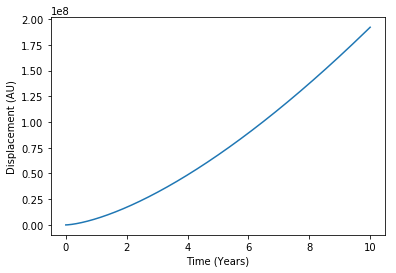

In [11]:
import matplotlib.pyplot as pyplot

pyplot.figure(1)

pyplot.plot(ts / YEAR_S , xs / AU)
pyplot.xlabel('Time (Years)')
pyplot.ylabel('Displacement (AU)')
pyplot.show()

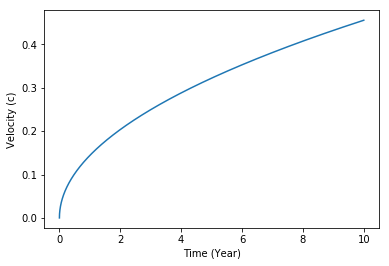

In [12]:
pyplot.figure(2)

pyplot.plot(ts / YEAR_S, vs / c )
pyplot.xlabel('Time (Year)')
pyplot.ylabel('Velocity (c)')
pyplot.show()

In [18]:
def dV_dt(V, t):  # EoM of the catcher with the launcher right next to the catcher - no time mapping 
    #Here U is a vector such that x = U[0] and z = x dot = U[1]. This function should return [x dot, x double dot]
    return[V[1], tau / ( 1 + (tau * m_0 / (v_e * F_L) ) * V[1])]

V_0 = [0, 0]
Vs = odeint(dV_dt, V_0, ts)
V_xs = Vs[:,0]
V_vs = Vs[:,1]

<function matplotlib.pyplot.show>

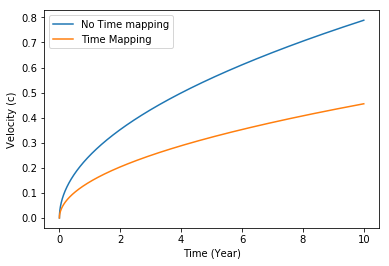

In [22]:
pyplot.plot(ts / YEAR_S , V_vs / c, label = 'No Time mapping')
pyplot.plot(ts / YEAR_S, vs / c, label = 'Time Mapping')

pyplot.xlabel('Time (Years)')
pyplot.ylabel('Velocity (c)')
pyplot.legend()

pyplot.show

In [32]:
def dV_dt(W, t):  # EoM of the catcher with the launcher right next to the catcher - no time mapping 
    #Here U is a vector such that x = U[0] and z = x dot = U[1]. This function should return [x dot, x double dot]
    return[W[1], F_L * ( c - W[1]) / (m_0 * c)]

W_ts = numpy.linspace(0, 0.04 * YEAR_S, 1e5)
W_0 = [0, 0]
Ws = odeint(dV_dt, V_0, W_ts)
W_xs = Ws[:,0]
W_vs = Ws[:,1]

C:\Users\user\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  """


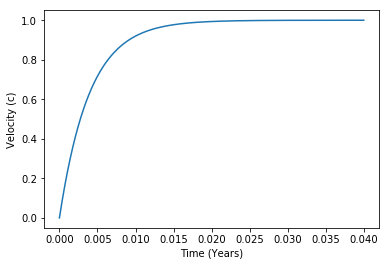

In [34]:
pyplot.plot(W_ts / YEAR_S, W_vs / c)

pyplot.xlabel('Time (Years)')
pyplot.ylabel('Velocity (c)')

pyplot.show()